In [30]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [31]:
import warnings

In [32]:
warnings.filterwarnings('ignore')

In [33]:
df1=pd.read_csv('M2SLMoneyStock.csv',index_col='Date',parse_dates=True)

In [34]:
df2=pd.read_csv('PCEPersonalSpending.csv',index_col='Date',parse_dates=True)

In [35]:
df1.index.freq='MS'
df2.index.freq='MS'

In [36]:
from statsmodels.tsa.api import VAR

In [37]:
from statsmodels.tools.eval_measures import rmse

In [38]:
from statsmodels.tsa.stattools import adfuller

In [39]:
df=df1.join(df2)

In [40]:
df

,Money,Spending
Date,,
1995-01-01,3492.4,4851.2
1995-02-01,3489.9,4850.8
1995-03-01,3491.1,4885.4
1995-04-01,3499.2,4890.2
1995-05-01,3524.2,4933.1
...,...,...
2015-08-01,12096.8,12394.0
2015-09-01,12153.8,12392.8
2015-10-01,12187.7,12416.1


<AxesSubplot:xlabel='Date'>

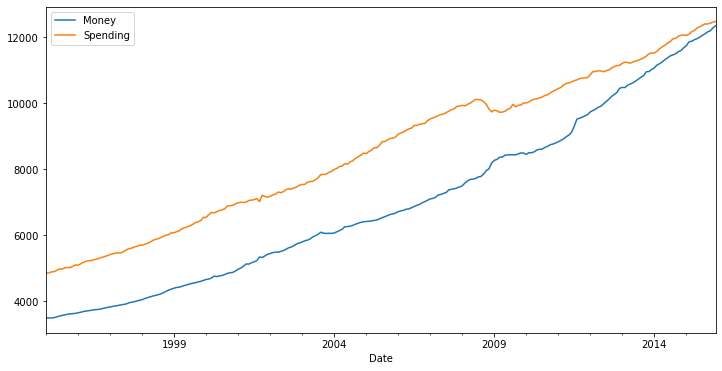

In [41]:
df.plot(figsize=(12,6))

In [44]:
auto_arima(df['Money'],maxiter=1000)

ARIMA(maxiter=1000, order=(1, 2, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [45]:
auto_arima(df['Spending'],maxiter=1000)

ARIMA(maxiter=1000, order=(1, 1, 2), scoring_args={}, suppress_warnings=True)

In [46]:
df_tr=df.diff().diff()

In [48]:
df_tr=df_tr.dropna()

In [49]:
df_tr

,Money,Spending
Date,,
1995-03-01,3.7,35.0
1995-04-01,6.9,-29.8
1995-05-01,16.9,38.1
1995-06-01,-0.3,1.5
1995-07-01,-6.2,-51.7
...,...,...
2015-08-01,-0.7,-8.5
2015-09-01,5.5,-39.8
2015-10-01,-23.1,24.5


In [50]:
from statsmodels.tsa.statespace.varmax import VARMAX,VARMAXResults

In [52]:
nobs=12
train, test = df_tr[0:-nobs], df_tr[-nobs:]

In [57]:
train.shape

(238, 2)

In [58]:
model=VARMAX(train,order=(1,2),trend='c')

In [59]:
rs=model.fit(maxiter=1000,disp=False)

In [61]:
rs.summary()

Dep. Variable:,"['Money', 'Spending']",No. Observations:,238
Model:,"VARMA(1,2)",Log Likelihood,-2286.243
,+ intercept,AIC,4606.486
Date:,"Sat, 03 Jul 2021",BIC,4665.515
Time:,22:04:25,HQIC,4630.276
Sample:,03-01-1995,,
,- 12-01-2014,,
Covariance Type:,opg,,
Ljung-Box (L1) (Q):,"0.55, 0.00",Jarque-Bera (JB):,"548.77, 116.50"
Prob(Q):,"0.46, 0.99",Prob(JB):,"0.00, 0.00"
Heteroskedasticity (H):,"5.63, 2.92",Skew:,"1.33, -0.34"


In [62]:
ree=rs.forecast(12)

In [64]:
ree

,Money,Spending
2015-01-01,-11.892752,37.903048
2015-02-01,-11.302937,-5.249421
2015-03-01,1.461305,-0.051776
2015-04-01,-1.632843,-0.459090
2015-05-01,0.990270,0.294793
2015-06-01,-0.335955,-0.030382
2015-07-01,0.457557,0.177040
2015-08-01,0.011035,0.062818
2015-09-01,0.267785,0.129011
2015-10-01,0.121286,0.091346


In [67]:
ree['Money1d'] = (df['Money'].iloc[-nobs-1]-df['Money'].iloc[-nobs-2]) + ree['Money'].cumsum()

# Now build the forecast values from the first difference set
ree['MoneyForecast'] = df['Money'].iloc[-nobs-1] + ree['Money1d'].cumsum()

In [69]:
ree['Spending1d'] = (df['Spending'].iloc[-nobs-1]-df['Spending'].iloc[-nobs-2]) + ree['Spending'].cumsum()

# Now build the forecast values from the first difference set
ree['SpendingForecast'] = df['Spending'].iloc[-nobs-1] + ree['Spending1d'].cumsum()

In [70]:
ree

,Money,Spending,Money1d,MoneyForecast,Spending1d,SpendingForecast
2015-01-01,-11.892752,37.903048,66.707248,11736.807248,48.503048,12110.503048
2015-02-01,-11.302937,-5.249421,55.404312,11792.211560,43.253627,12153.756675
2015-03-01,1.461305,-0.051776,56.865617,11849.077177,43.201851,12196.958526
2015-04-01,-1.632843,-0.459090,55.232774,11904.309950,42.742761,12239.701287
2015-05-01,0.990270,0.294793,56.223044,11960.532994,43.037554,12282.738840
2015-06-01,-0.335955,-0.030382,55.887089,12016.420083,43.007172,12325.746013
2015-07-01,0.457557,0.177040,56.344645,12072.764728,43.184212,12368.930225
2015-08-01,0.011035,0.062818,56.355681,12129.120409,43.247030,12412.177255
2015-09-01,0.267785,0.129011,56.623466,12185.743875,43.376041,12455.553296
2015-10-01,0.121286,0.091346,56.744752,12242.488627,43.467387,12499.020683


In [71]:
pd.concat([df.iloc[-12:],ree[['MoneyForecast','SpendingForecast']]],axis=1)

,Money,Spending,MoneyForecast,SpendingForecast
Date,,,,
2015-01-01,11733.2,12046.0,11736.807248,12110.503048
2015-02-01,11852.4,12082.4,11792.211560,12153.756675
2015-03-01,11868.8,12158.3,11849.077177,12196.958526
2015-04-01,11916.1,12193.8,11904.309950,12239.701287
2015-05-01,11947.6,12268.1,11960.532994,12282.738840
2015-06-01,11993.1,12308.3,12016.420083,12325.746013
2015-07-01,12045.3,12355.4,12072.764728,12368.930225
2015-08-01,12096.8,12394.0,12129.120409,12412.177255
2015-09-01,12153.8,12392.8,12185.743875,12455.553296


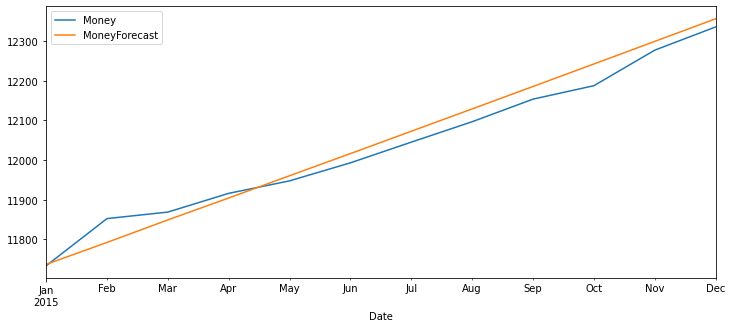

In [72]:
df['Money'][-nobs:].plot(figsize=(12,5),legend=True).autoscale(axis='x',tight=True)
ree['MoneyForecast'].plot(legend=True);

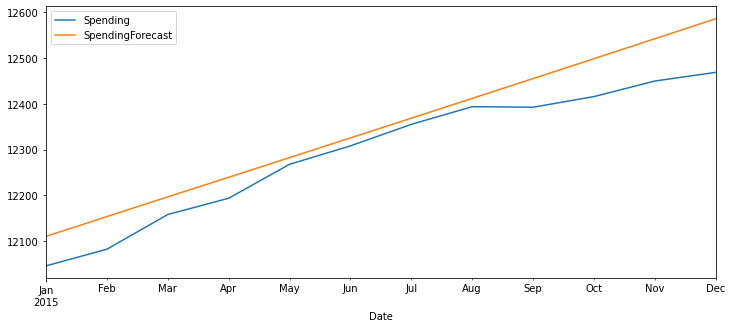

In [73]:
df['Spending'][-nobs:].plot(figsize=(12,5),legend=True).autoscale(axis='x',tight=True)
ree['SpendingForecast'].plot(legend=True);

In [74]:
RMSE1 = rmse(df['Money'][-nobs:], ree['MoneyForecast'])
print(f'Money VAR(5) RMSE: {RMSE1:.3f}')

Money VAR(5) RMSE: 31.102


In [75]:
RMSE2 = rmse(df['Spending'][-nobs:], ree['SpendingForecast'])
print(f'Spending VAR(5) RMSE: {RMSE2:.3f}')

Spending VAR(5) RMSE: 62.575
